<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

In [7]:
# Remove duplicate rows
df_romove_duplicates = df.drop_duplicates()

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [9]:
## Write your code here
missing_values = df['CodingActivities'].isnull()
print(missing_values)

0        False
1        False
2        False
3         True
4         True
         ...  
65432    False
65433    False
65434    False
65435    False
65436     True
Name: CodingActivities, Length: 65437, dtype: bool


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [10]:
## Write your code here
# Impute missing values CodingActivities using forward-fill
df['CodingActivities'] = df['CodingActivities'].ffill()

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


In [15]:
# Replace NaN values with the mean of the ConvertedCompYearly column
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)

/tmp/ipykernel_2861/181054894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Function to identify compensation-related columns
def identify_compensation_columns(df, keywords):
    comp_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in keywords)]
    return comp_columns

# Function to normalize compensation-related columns
def normalize_compensation_columns(df, comp_columns):
    for col in comp_columns:
        # Convert column to numeric values, ignoring non-numeric values
        df[col] = pd.to_numeric(df[col], errors='coerce')
    # Normalize columns
    scaler = MinMaxScaler()
    df[comp_columns] = scaler.fit_transform(df[comp_columns])
    return df

# Get compensation-related columns
compensation_columns = identify_compensation_columns(df, comp_keywords)

# Normalize compensation-related columns
df_normalized = normalize_compensation_columns(df, compensation_columns)

print(df_normalized[compensation_columns])


       CompTotal  AIComplex  ConvertedCompYearly
0            NaN        NaN               0.0053
1            NaN        NaN               0.0053
2            NaN        NaN               0.0053
3            NaN        NaN               0.0053
4            NaN        NaN               0.0053
...          ...        ...                  ...
65432        NaN        NaN               0.0053
65433        NaN        NaN               0.0053
65434        NaN        NaN               0.0053
65435        NaN        NaN               0.0053
65436        NaN        NaN               0.0053

[65437 rows x 3 columns]


/opt/conda/lib/python3.12/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/opt/conda/lib/python3.12/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
## Write your code here

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [23]:
## Write your code here
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the 'ConvertedCompYearly' column
df['NormalizedComp'] = scaler.fit_transform(df[['ConvertedCompYearly']])

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [28]:
from scipy.stats import zscore

# Applying Z-score normalization
df['ConvertedCompYearly_Zscore'] = zscore(df['ConvertedCompYearly'])

print(df)


       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [31]:
# Verify the DataFrame columns
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'NormalizedComp', 'ConvertedCompYearly_Zscore'],
      dtype='object', length=116)


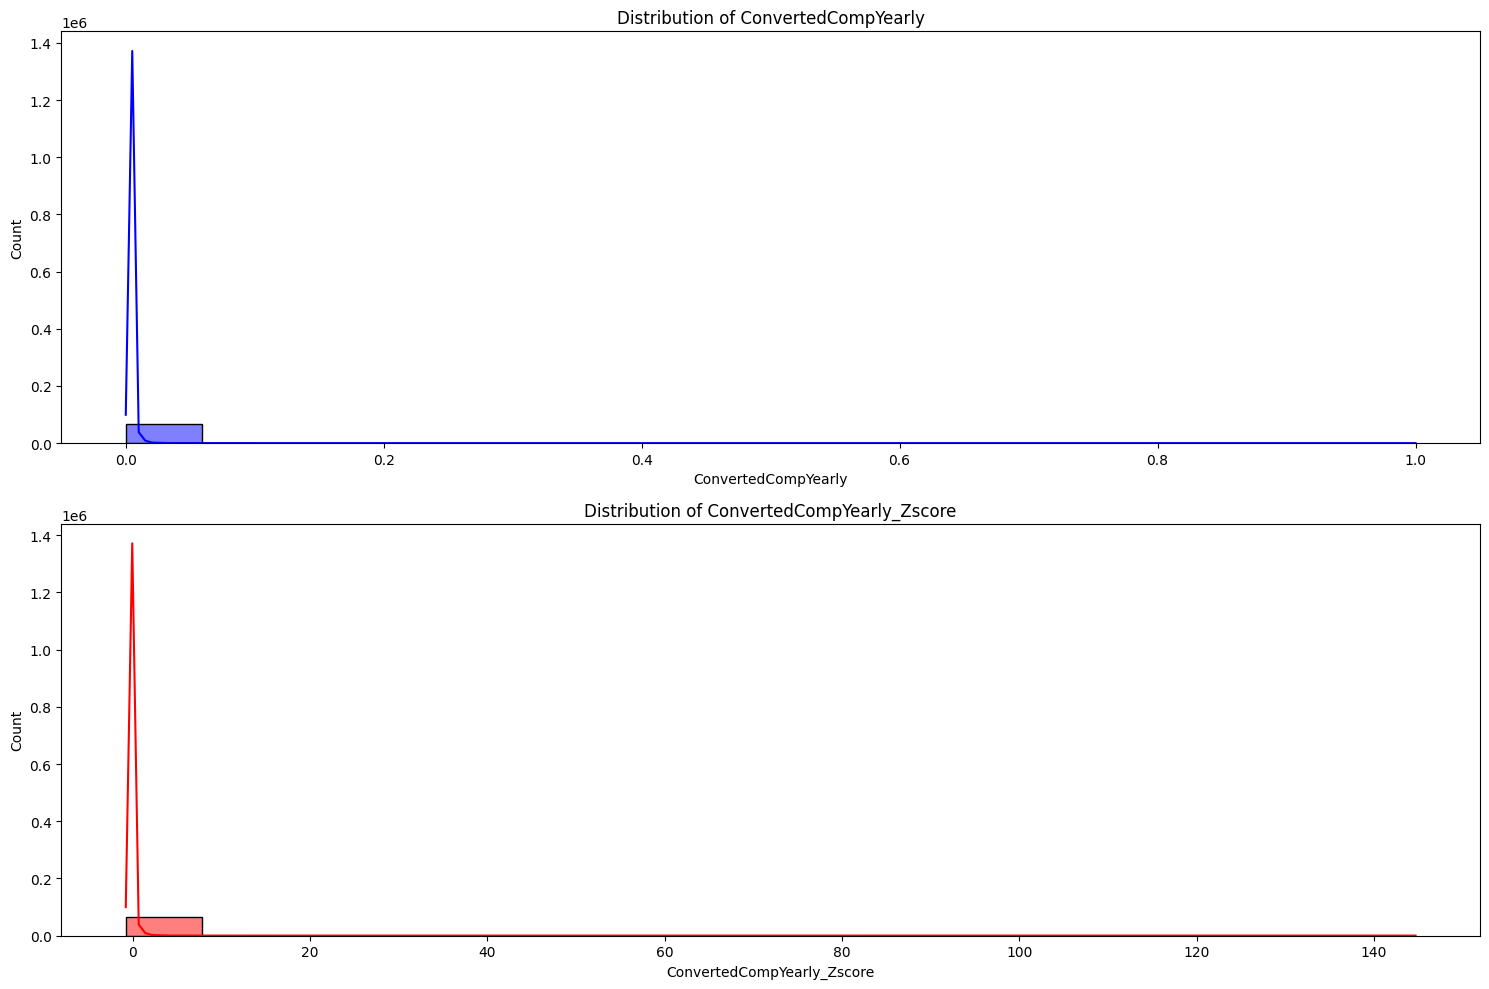

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


# Ensure 'ConvertedCompYearly' exists in the DataFrame
if 'ConvertedCompYearly' in df.columns:
    # Drop missing values in 'ConvertedCompYearly' to avoid computation errors
    df = df.dropna(subset=['ConvertedCompYearly'])

    # Apply Z-score normalization
    df['ConvertedCompYearly_Zscore'] = zscore(df['ConvertedCompYearly'])

    # Plotting the distributions
    plt.figure(figsize=(15, 10))

    # Histogram and KDE for ConvertedCompYearly
    plt.subplot(2, 1, 1)
    sns.histplot(df['ConvertedCompYearly'], kde=True, color='blue')
    plt.title('Distribution of ConvertedCompYearly')

    # Histogram and KDE for ConvertedCompYearly_Zscore
    plt.subplot(2, 1, 2)
    sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='red')
    plt.title('Distribution of ConvertedCompYearly_Zscore')

    plt.tight_layout()
    plt.show()
else:
    print("'ConvertedCompYearly' column is not present in the DataFrame.")


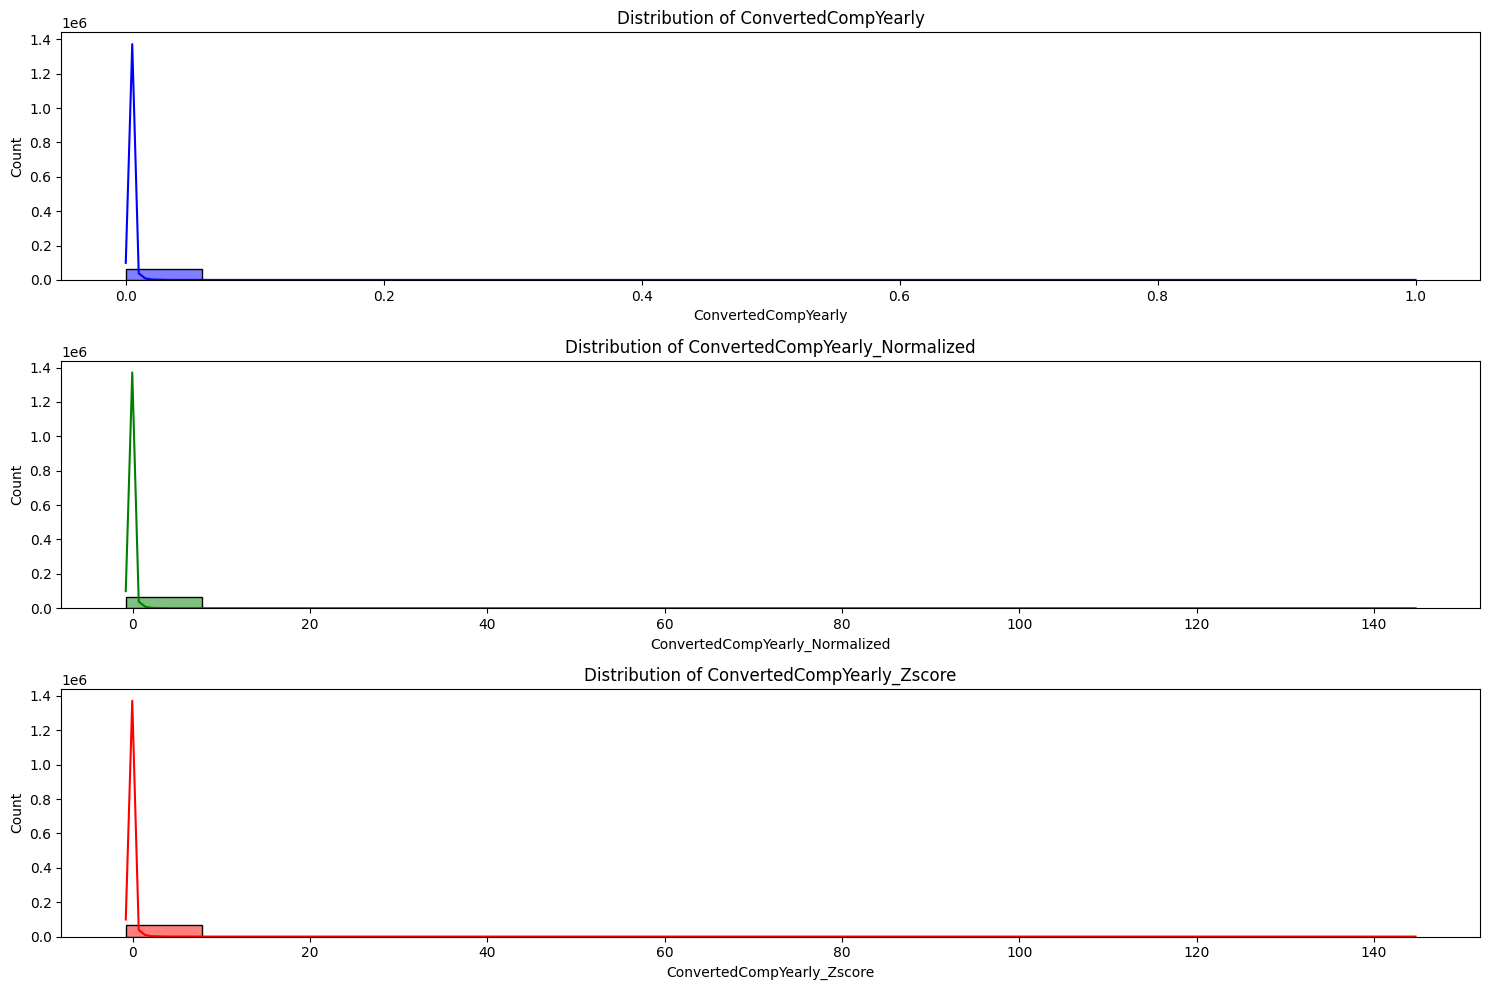

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if 'ConvertedCompYearly_Normalized' not in df.columns:
    df['ConvertedCompYearly_Normalized'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# Assuming df['ConvertedCompYearly_Zscore'] is already calculated or adding it
if 'ConvertedCompYearly_Zscore' not in df.columns:
    df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# Plotting the distribution
plt.figure(figsize=(15, 10))

# Histogram and KDE for ConvertedCompYearly
plt.subplot(3, 1, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, color='blue')
plt.title('Distribution of ConvertedCompYearly')

# Histogram and KDE for ConvertedCompYearly_Normalized
plt.subplot(3, 1, 2)
sns.histplot(df['ConvertedCompYearly_Normalized'], kde=True, color='green')
plt.title('Distribution of ConvertedCompYearly_Normalized')

# Histogram and KDE for ConvertedCompYearly_Zscore
plt.subplot(3, 1, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='red')
plt.title('Distribution of ConvertedCompYearly_Zscore')

plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
